# Projeto - Machine Learning II | Santander Coders 2024.2 - DS

_*Análise Exploratória de Dados e Tratamentos._

## Problema de Negócios

O objetivo deste projeto é segmentar os grupos de clientes para fornecer insumos a recomendação de oferta para clientes que permaneceram a fim de premiar a fidelidade e aqueles que cancelaram o serviço a fim de evitar o cancelamento do serviço por estes clientes. _(acrescentar que o custo de conquista de um cliente é maior do que o custo de mantê-lo, por isso é importante mapear segmentos de clientes e mapear estratégias para retê-los). 

## Bibliotecas 

In [85]:
# Bibliotecas básicas 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Pré-processamento
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

# Clusterização
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import warnings 
warnings.filterwarnings('ignore')

## Dicionário de dados

https://www.kaggle.com/datasets/shilongzhuang/telecom-customer-churn-by-maven-analytics?resource=download

_*telecom_zipcode_population._

- **CustomerID**: Um ID exclusivo que identifica cada cliente.  
- **Gender**: Gênero do cliente: Masculino, Feminino.  
- **Age**: Idade atual do cliente, em anos, no final do trimestre fiscal (Q2 2022).  
- **Married**: Indica se o cliente é casado: Sim, Não.  
- **Number of Dependents**: Indica o número de dependentes que moram com o cliente (os dependentes podem ser filhos, pais, avós, etc.).  
- **City**: Cidade da residência principal do cliente na Califórnia.  
- **Zip Code**: Código postal da residência principal do cliente.  
- **Latitude**: Latitude da residência principal do cliente.  
- **Longitude**: Longitude da residência principal do cliente.  
- **Number of Referrals**: Indica o número de vezes que o cliente indicou um amigo ou familiar para a empresa até o momento.  
- **Tenure in Months**: Indica o total de meses que o cliente esteve com a empresa até o final do trimestre especificado.  
- **Offer**: Identifica a última oferta de marketing aceita pelo cliente: Nenhuma, Oferta A, Oferta B, Oferta C, Oferta D, Oferta E.  
- **Phone Service**: Indica se o cliente é assinante de serviço de telefone fixo com a empresa: Sim, Não.  
- **Avg Monthly Long Distance Charges**: Indica os custos médios do cliente com chamadas de longa distância, calculados até o final do trimestre especificado (se o cliente não for assinante de telefone fixo, será 0).  
- **Multiple Lines**: Indica se o cliente é assinante de múltiplas linhas telefônicas com a empresa: Sim, Não (se o cliente não for assinante de telefone fixo, será Não).  
- **Internet Service**: Indica se o cliente é assinante de serviço de Internet com a empresa: Sim, Não.  
- **Internet Type**: Indica o tipo de conexão de Internet do cliente: DSL, Fibra Óptica, Cabo (se o cliente não for assinante de Internet, será Nenhum).  
- **Avg Monthly GB Download**: Indica o volume médio de download do cliente em gigabytes, calculado até o final do trimestre especificado (se o cliente não for assinante de Internet, será 0).  
- **Online Security**: Indica se o cliente é assinante de um serviço adicional de segurança online oferecido pela empresa: Sim, Não (se o cliente não for assinante de Internet, será Não).  
- **Online Backup**: Indica se o cliente é assinante de um serviço adicional de backup online oferecido pela empresa: Sim, Não (se o cliente não for assinante de Internet, será Não).  
- **Device Protection Plan**: Indica se o cliente é assinante de um plano de proteção para os equipamentos de Internet oferecido pela empresa: Sim, Não (se o cliente não for assinante de Internet, será Não).  
- **Premium Tech Support**: Indica se o cliente é assinante de um plano adicional de suporte técnico com tempos de espera reduzidos: Sim, Não (se o cliente não for assinante de Internet, será Não).  
- **Streaming TV**: Indica se o cliente utiliza o serviço de Internet para assistir TV via streaming de terceiros sem custo adicional: Sim, Não (se o cliente não for assinante de Internet, será Não).  
- **Streaming Movies**: Indica se o cliente utiliza o serviço de Internet para assistir filmes via streaming de terceiros sem custo adicional: Sim, Não (se o cliente não for assinante de Internet, será Não).  
- **Streaming Music**: Indica se o cliente utiliza o serviço de Internet para ouvir música via streaming de terceiros sem custo adicional: Sim, Não (se o cliente não for assinante de Internet, será Não).  
**Unlimited Data**: Indica se o cliente paga uma taxa adicional mensal para ter downloads/uploads de dados ilimitados: Sim, Não (se o cliente não for assinante de Internet, será Não).  
- **Contract**: Indica o tipo atual de contrato do cliente: Mensal, Um Ano, Dois Anos.  
- **Paperless Billing**: Indica se o cliente escolheu a opção de cobrança sem papel: Sim, Não.  
- **Payment Method**: Indica como o cliente paga suas faturas: Débito em Conta, Cartão de Crédito, Cheque Enviado.  
- **Monthly Charge**: Indica o valor mensal atual total cobrado ao cliente por todos os seus serviços com a empresa.  
- **Total Charges**: Indica o total de cobranças do cliente, calculado até o final do trimestre especificado.  
- **Total Refunds**: Indica o total de reembolsos do cliente, calculado até o final do trimestre especificado.  
- **Total Extra Data Charges**: Indica o total de cobranças por dados adicionais baixados além do especificado no plano do cliente, até o final do trimestre especificado.  
- **Total Long Distance Charges**: Indica o total de cobranças por chamadas de longa distância além do especificado no plano do cliente, até o final do trimestre especificado.  
- **Total Revenue**: Indica o total de receita da empresa com este cliente, calculado até o final do trimestre especificado (Cobranças Totais - Reembolsos Totais + Cobranças por Dados Adicionais + Cobranças por Longa Distância).  
- **Customer Status**: Indica o status do cliente no final do trimestre: Cancelado, Ativo, Novo.  
- **Churn Category**: Uma categoria geral para o motivo de cancelamento do cliente, coletado quando ele deixa a empresa: Atitude, Concorrência, Insatisfação, Outro, Preço (relacionado diretamente ao Motivo de Cancelamento).  
- **Churn Reason**: Motivo específico pelo qual o cliente deixou a empresa, coletado quando ele cancela (relacionado diretamente à Categoria de Cancelamento).

_*telecom_zipcode_population._

- **Zip Code**: Código postal da residência principal do cliente.  
- **Population**: Estimativa atual de população para toda a área correspondente ao código postal.  

## Carregando os dados 

In [2]:
df = pd.read_csv("datasets/telecom_customer_churn.csv", encoding = 'ISO-8859-1')
#df_zipcode = pd.read_csv("C:/Users/User/Santander Coders - Projetos Finais/Módulo 06 - Machine Learning II/telecom_zipcode_population.csv", encoding = 'ISO-8859-1')
#df_dicionario = pd.read_csv("C:/Users/User/Santander Coders - Projetos Finais/Módulo 06 - Machine Learning II/telecom_data_dictionary.csv", encoding = 'ISO-8859-1')

## Análise Exploratória de Dados

### Checagens iniciais dos dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

### Quantidade de valores nulos

In [4]:
na_quantidade = df.isna().sum()
na_percentual = (na_quantidade / len(df)) * 100

na_quantidade_maior0 = na_quantidade[na_quantidade > 0]
na_percentual_maior0 = na_percentual[na_quantidade > 0]

na_df = pd.DataFrame({
    'Variáveis': na_quantidade_maior0.index,
    'Nº de nulos': na_quantidade_maior0.values,
    '% nulos': na_percentual_maior0.values
})

print(na_df)

                            Variáveis  Nº de nulos    % nulos
0                               Offer         3877  55.047565
1   Avg Monthly Long Distance Charges          682   9.683374
2                      Multiple Lines          682   9.683374
3                       Internet Type         1526  21.666903
4             Avg Monthly GB Download         1526  21.666903
5                     Online Security         1526  21.666903
6                       Online Backup         1526  21.666903
7              Device Protection Plan         1526  21.666903
8                Premium Tech Support         1526  21.666903
9                        Streaming TV         1526  21.666903
10                   Streaming Movies         1526  21.666903
11                    Streaming Music         1526  21.666903
12                     Unlimited Data         1526  21.666903
13                     Churn Category         5174  73.463013
14                       Churn Reason         5174  73.463013


### Quantidade de linhas duplicadas

In [5]:
print(f'Número de linhas duplicadas: {len(df.duplicated()[df.duplicated() == True])}')

Número de linhas duplicadas: 0


### Estatísticas descritivas gerais 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,7043.0,46.509726,16.750352,19.000000,32.000000,46.000000,60.000000,80.000000
Number of Dependents,7043.0,0.468692,0.962802,0.000000,0.000000,0.000000,0.000000,9.000000
Zip Code,7043.0,93486.070567,1856.767505,90001.000000,92101.000000,93518.000000,95329.000000,96150.000000
Latitude,7043.0,36.197455,2.468929,32.555828,33.990646,36.205465,38.161321,41.962127
Longitude,7043.0,-119.756684,2.154425,-124.301372,-121.788090,-119.595293,-117.969795,-114.192901
Number of Referrals,7043.0,1.951867,3.001199,0.000000,0.000000,0.000000,3.000000,11.000000
Tenure in Months,7043.0,32.386767,24.542061,1.000000,9.000000,29.000000,55.000000,72.000000
Avg Monthly Long Distance Charges,6361.0,25.420517,14.200374,1.010000,13.050000,25.690000,37.680000,49.990000
Avg Monthly GB Download,5517.0,26.189958,19.586585,2.000000,13.000000,21.000000,30.000000,85.000000
Monthly Charge,7043.0,63.596131,31.204743,-10.000000,30.400000,70.050000,89.750000,118.750000


In [7]:
sns.set_context('paper')

paleta = [
    '#2b4b8a',  # Azul Escuro
    '#5275b4',  # Azul Médio
    '#84a1cf',  # Azul Claro
    '#c8c8c8',  # Neutro
    '#d88886',  # Vermelho Claro
    '#b74a4a',  # Vermelho Médio
    '#892929',  # Vermelho Escuro
]

subpaleta1 = [
    '#892929',  # Vermelho Escuro
    '#c8c8c8',  # Neutro
    '#2b4b8a'   # Azul Escuro
]

subpaleta2 = [
    '#2b4b8a',  # Azul Escuro
    '#892929',  # Vermelho Escuro
     '#c8c8c8'  # Neutro
]

In [8]:
df_numericas = df.select_dtypes(include= np.number).columns
colunas_numericas = df_numericas.to_list()
colunas_numericas.remove('Zip Code')

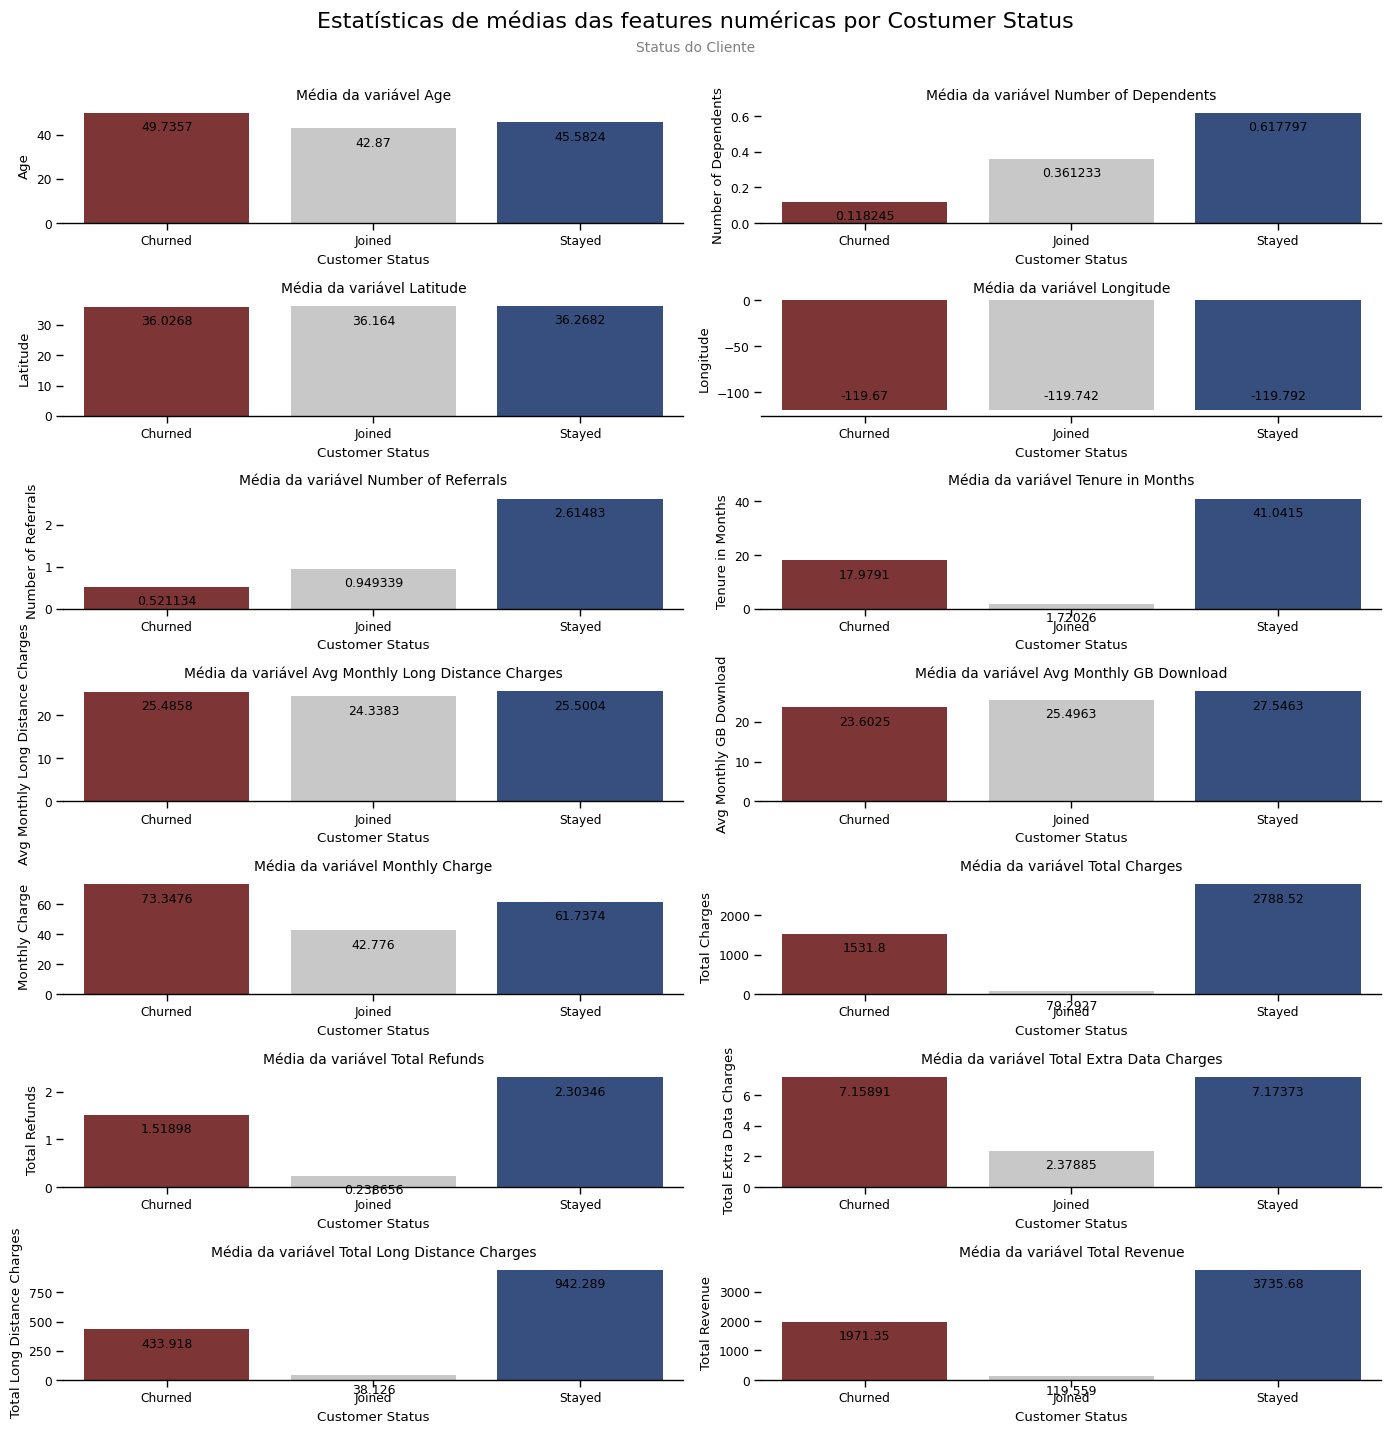

In [9]:
plt.figure(figsize = (14, 14))
plt.suptitle('Estatísticas de médias das features numéricas por Costumer Status', y=1.02, fontsize=16)
plt.figtext(0.5, 0.99, 'Status do Cliente', ha='center', fontsize=10, color='gray')

for i, q in enumerate(colunas_numericas, 1):
    plt.subplot(7, 2, i)
    estatisticas_media = df.groupby(['Customer Status'])[q].mean().reset_index()
    ax = sns.barplot(data = estatisticas_media, x = 'Customer Status', y = q, palette = subpaleta1)
    ax.bar_label(ax.containers[0], fontsize=9, padding = -15)
    ax.bar_label(ax.containers[1], fontsize=9, padding = -15)
    ax.bar_label(ax.containers[2], fontsize=9, padding = -15)
    sns.despine(left = True)
    plt.title(f'Média da variável {q}', fontsize=10)

plt.tight_layout()
#plt.figure(dpi=120)
plt.show()

In [10]:
colunas_categoricas = df.select_dtypes(exclude= np.number).columns
colunas_categoricas = colunas_categoricas.to_list()

nunique_colunas_categoricas = df.select_dtypes(include = 'object').nunique()
variaveis_remover = nunique_colunas_categoricas[nunique_colunas_categoricas > 10].index.to_list()

for col in variaveis_remover:
    colunas_categoricas.remove(col)

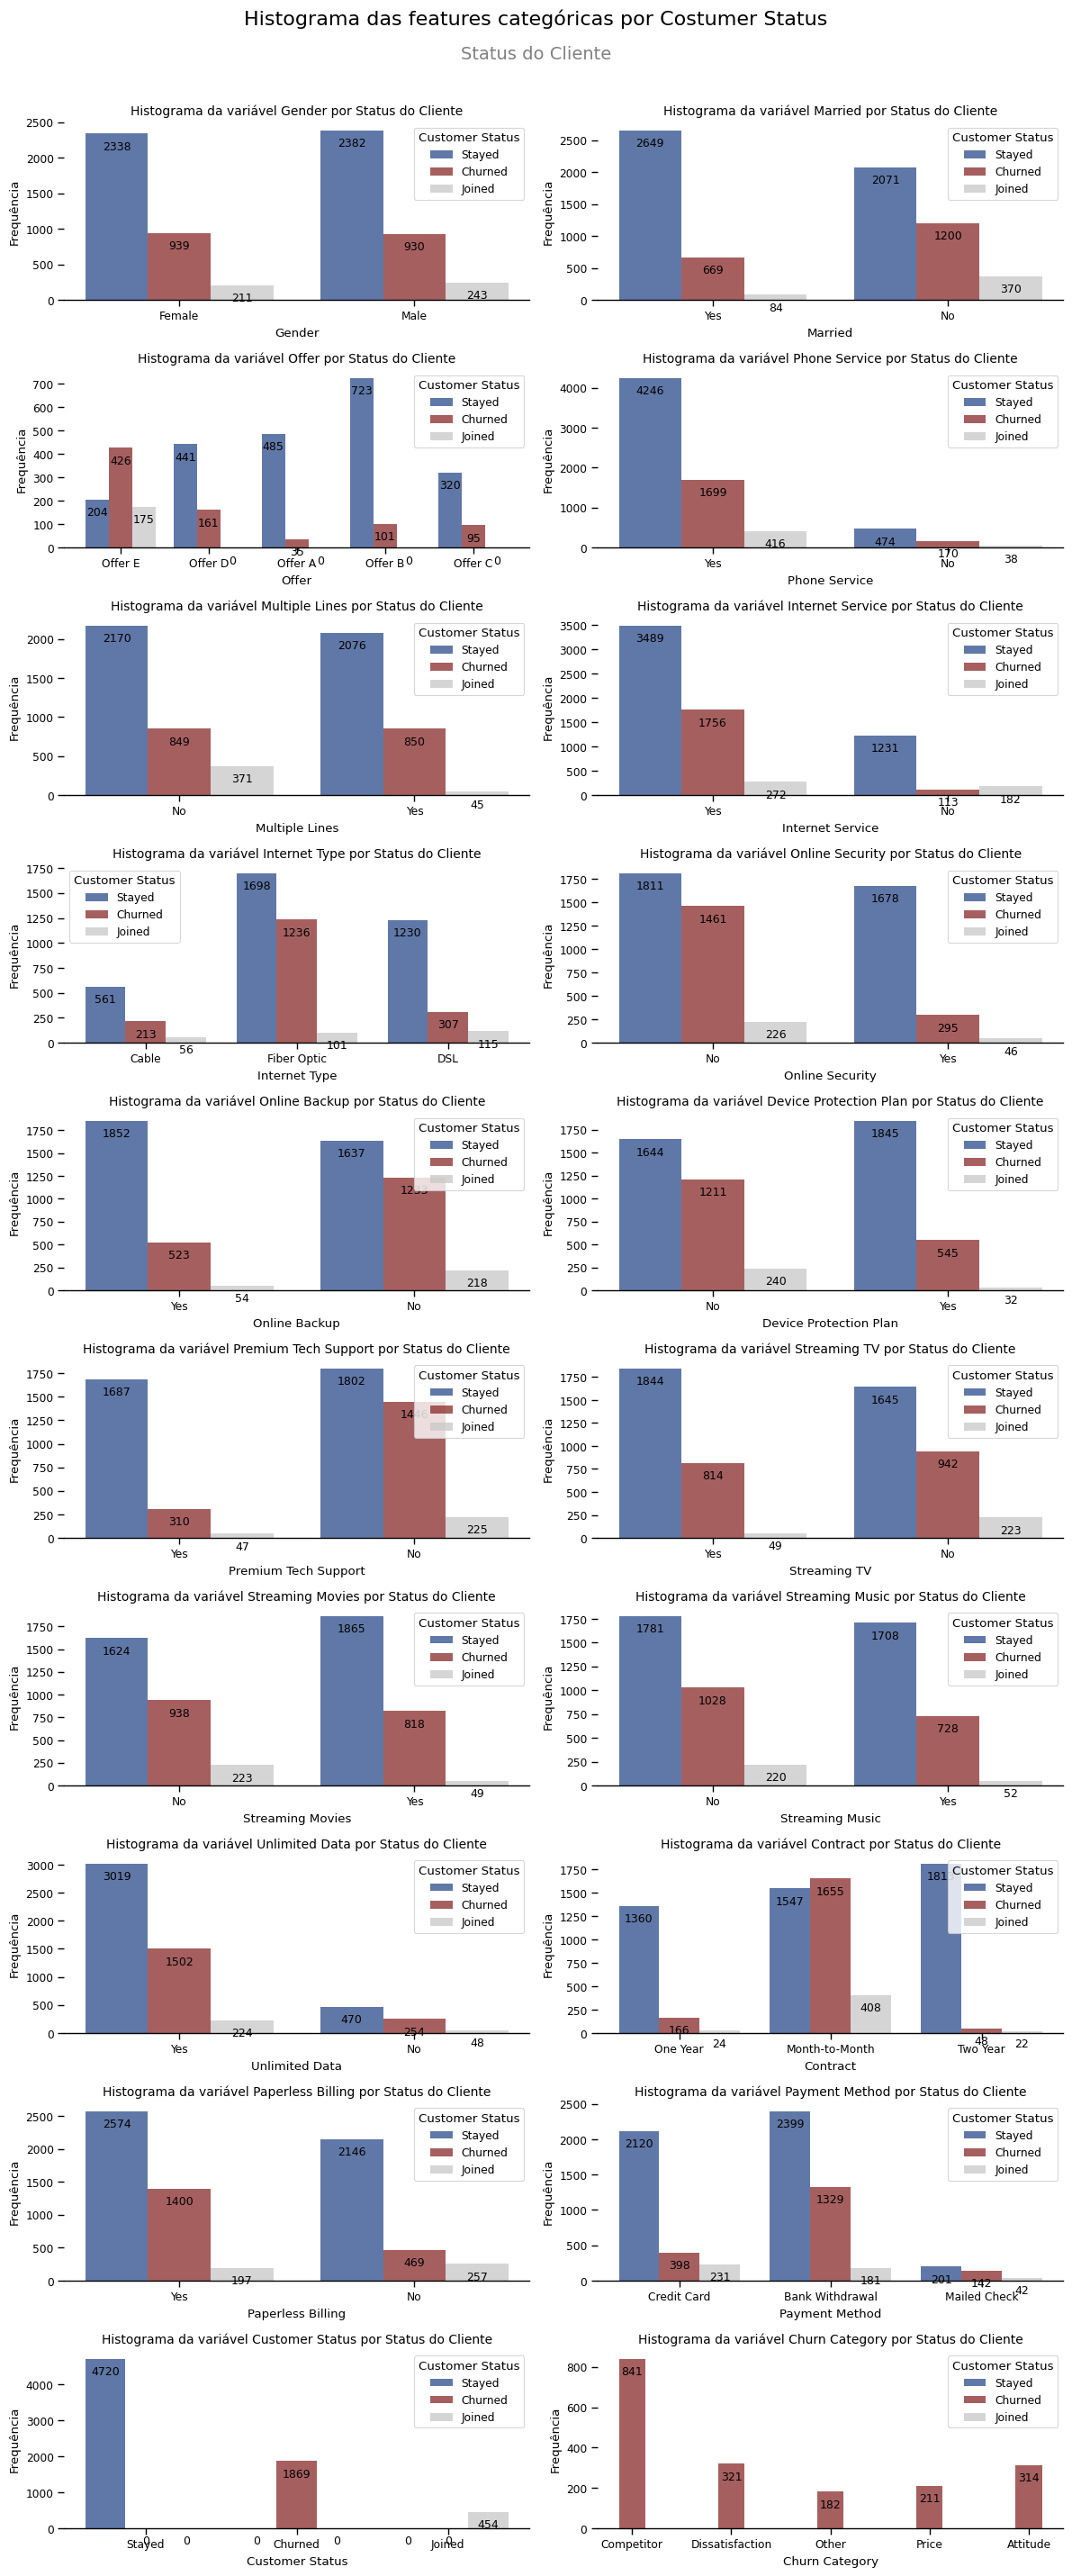

In [11]:
plt.figure(figsize = (12, 28))
plt.suptitle('Histograma das features categóricas por Costumer Status', y=1.02, fontsize=16)
plt.figtext(0.5, 1, 'Status do Cliente', ha='center', fontsize=14, color='gray')

for i, q in enumerate(colunas_categoricas, 1):
    plt.subplot(10, 2, i)
    ax = sns.histplot(data=df, 
                      x=q,  
                      stat = 'count',
                      hue="Customer Status", 
                      multiple="dodge", 
                      shrink=.8, 
                      palette = subpaleta2, 
                      edgecolor = 'gray', 
                      linewidth = 0)
    for container in ax.containers:
            ax.bar_label(container, fontsize=9, padding=-15, fmt='%.0f') 
    sns.despine(left = True)
    plt.title(f'Histograma da variável {q} por Status do Cliente', fontsize=10)
    plt.ylabel('Frequência')

plt.tight_layout()
#plt.figure(dpi=120)
plt.show()

**Observações**

**Numéricas**
- Tirar longitude e latitude (e zipcode) porque são clientes do mesmo local.

**Categóricas**
- Fazer avaliações em termos absolutos para ver quais as variáveis tediferenças mais gritantes entre os grupos de clientes e levar em consideração o termo absoluto das variáveis (por exemplo, se mais homens permaneceram pode ser que existam mais clientes homens).
- Variáveis com discrepância no grupo de churn:
    - A variável "Premium Tech Support" apresenta um número consideravelmente relevante de cancelamentos entre os clientes que não têm suporte técnico premium, mas a taxa dos clientes retido também maior comparado a outra categoria da variável (apesar de ser sutil). 

### Correlações 

In [12]:
colunas_numericas.remove('Latitude')
colunas_numericas.remove('Longitude')

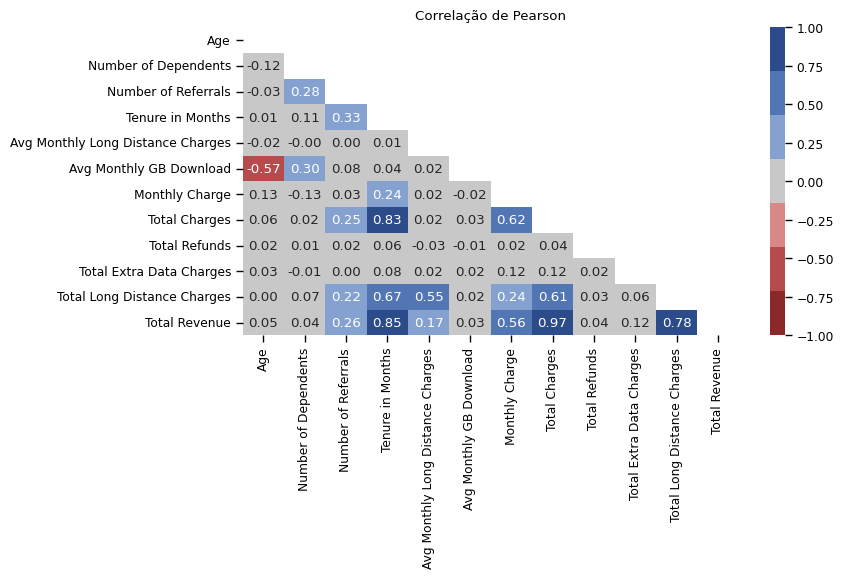

In [13]:
plt.figure(figsize=(8, 4)) 

dados = df[colunas_numericas]
correlation_matrix = dados.corr(method='pearson')
mask = np.triu(np.ones_like(correlation_matrix))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap=list(reversed(paleta)), 
            fmt='.2f', 
            mask=mask, 
            vmin = -1,
            vmax = 1,
            xticklabels=correlation_matrix.columns, 
            yticklabels=correlation_matrix.columns)

plt.title("Correlação de Pearson")
plt.show()

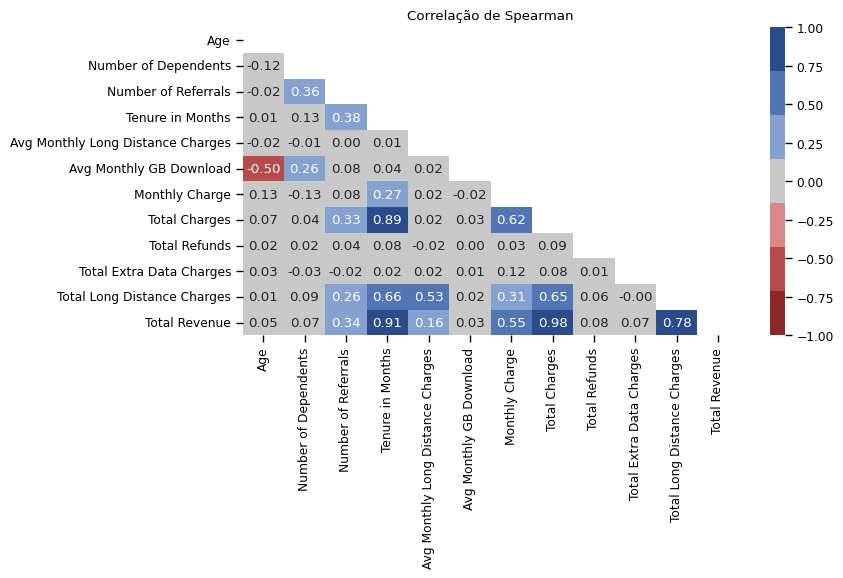

In [14]:
plt.figure(figsize=(8, 4)) 

dados = df[colunas_numericas]
correlation_matrix = dados.corr(method='spearman')
mask = np.triu(np.ones_like(correlation_matrix))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap=list(reversed(paleta)), 
            fmt='.2f', 
            mask=mask, 
            vmin = -1,
            vmax = 1,
            xticklabels=correlation_matrix.columns, 
            yticklabels=correlation_matrix.columns)

plt.title("Correlação de Spearman")
plt.show()

**Observação**
- Explicar o porquê faz sentido as correlações mais fortes - acima de 0.2 - (ir para descrição das variáveis) na correlação de pearson e depois na correlação de spearman. Destacar o porquê é importante os dois métodos de correlação. 

## Seleção de variáveis

Variáveis a serem excluídas:
Excluir a variável 'Churn Reason', 'Latitude', 'Longitude', 'Churn Category', 'Offer'.
- **Customer ID**

In [15]:
df_selecao = df.copy()

In [16]:
colunas_remover = ['Customer ID', 'City', 'Latitude', 'Longitude', 'Churn Reason', 'Churn Category', 'Offer']

In [17]:
df_selecao = df_selecao.drop(columns = colunas_remover, axis = 1)

## Tratamentos 

- Substituir os missing values pela constante (no caso da variáveis categóricas)
- Substituir os missing values pela mediana (para evitar outliers) nas variáveis numéricas 
- Padronizar os dados porque vamos usar dois métodos baseados em distância (K-means e Clusterização Hierárquica) (usar o robustscaler ou standardScaler).

### Missing values

In [18]:
na_quant = df_selecao.isna().sum()
na_percent = (na_quant / len(df)) * 100

na_quant_maior0 = na_quant[na_quant > 0]
na_percent_maior0 = na_percent[na_quant > 0]

na_df_selecao = pd.DataFrame({
    'Variáveis': na_quant_maior0.index,
    'Nº de nulos': na_quant_maior0.values,
    '% nulos': na_percent_maior0.values
})

print(na_df_selecao)

                            Variáveis  Nº de nulos    % nulos
0   Avg Monthly Long Distance Charges          682   9.683374
1                      Multiple Lines          682   9.683374
2                       Internet Type         1526  21.666903
3             Avg Monthly GB Download         1526  21.666903
4                     Online Security         1526  21.666903
5                       Online Backup         1526  21.666903
6              Device Protection Plan         1526  21.666903
7                Premium Tech Support         1526  21.666903
8                        Streaming TV         1526  21.666903
9                    Streaming Movies         1526  21.666903
10                    Streaming Music         1526  21.666903
11                     Unlimited Data         1526  21.666903


In [19]:
variaveis_com_nulos = list(na_quant[na_quant>0].index)

In [20]:
variaveis_com_nulos_float = df[variaveis_com_nulos].dtypes[df[variaveis_com_nulos].dtypes == 'float'].index
variaveis_com_nulos_float = variaveis_com_nulos_float.to_list()

In [21]:
variaveis_com_nulos_float

['Avg Monthly Long Distance Charges', 'Avg Monthly GB Download']

In [22]:
variaveis_com_nulos_object = df[variaveis_com_nulos].dtypes[df[variaveis_com_nulos].dtypes == 'object'].index
variaveis_com_nulos_object = variaveis_com_nulos_object.to_list()

In [23]:
variaveis_com_nulos_object

['Multiple Lines',
 'Internet Type',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data']

### Valores discrepantes

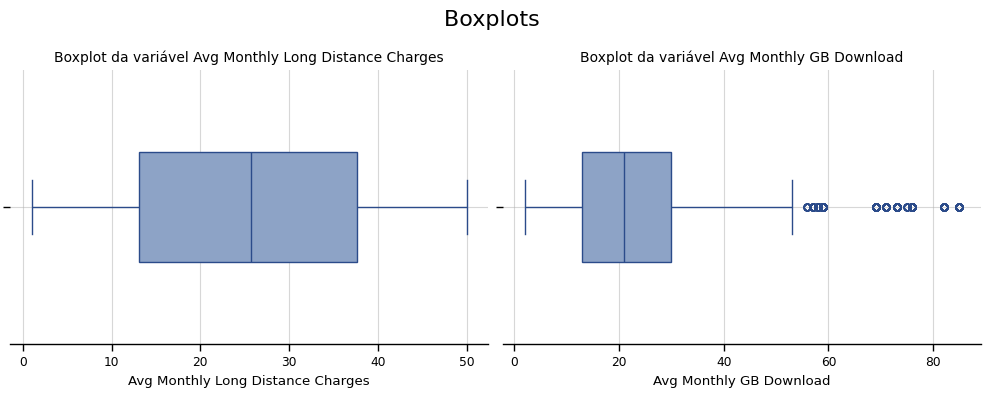

In [24]:
plt.figure(figsize = (10, 4))
plt.suptitle('Boxplots ', fontsize=16)

for i, q in enumerate(variaveis_com_nulos_float, 1):
    plt.subplot(1, 2, i)
    ax = sns.boxplot(data = df[q], color = paleta[2], linecolor = paleta[0], orient='h', width=0.4)
    sns.despine(left = True)
    plt.title(f'Boxplot da variável {q}', fontsize=10)
    plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()

A 'Avg Monthly GB Donwload' tem outliers, por isso é importante substituir os dados faltantes pela mediana.

In [25]:
colunas_continuas = list(df_selecao.select_dtypes(include = 'float').columns)
colunas_continuas

['Avg Monthly Long Distance Charges',
 'Avg Monthly GB Download',
 'Monthly Charge',
 'Total Charges',
 'Total Refunds',
 'Total Long Distance Charges',
 'Total Revenue']

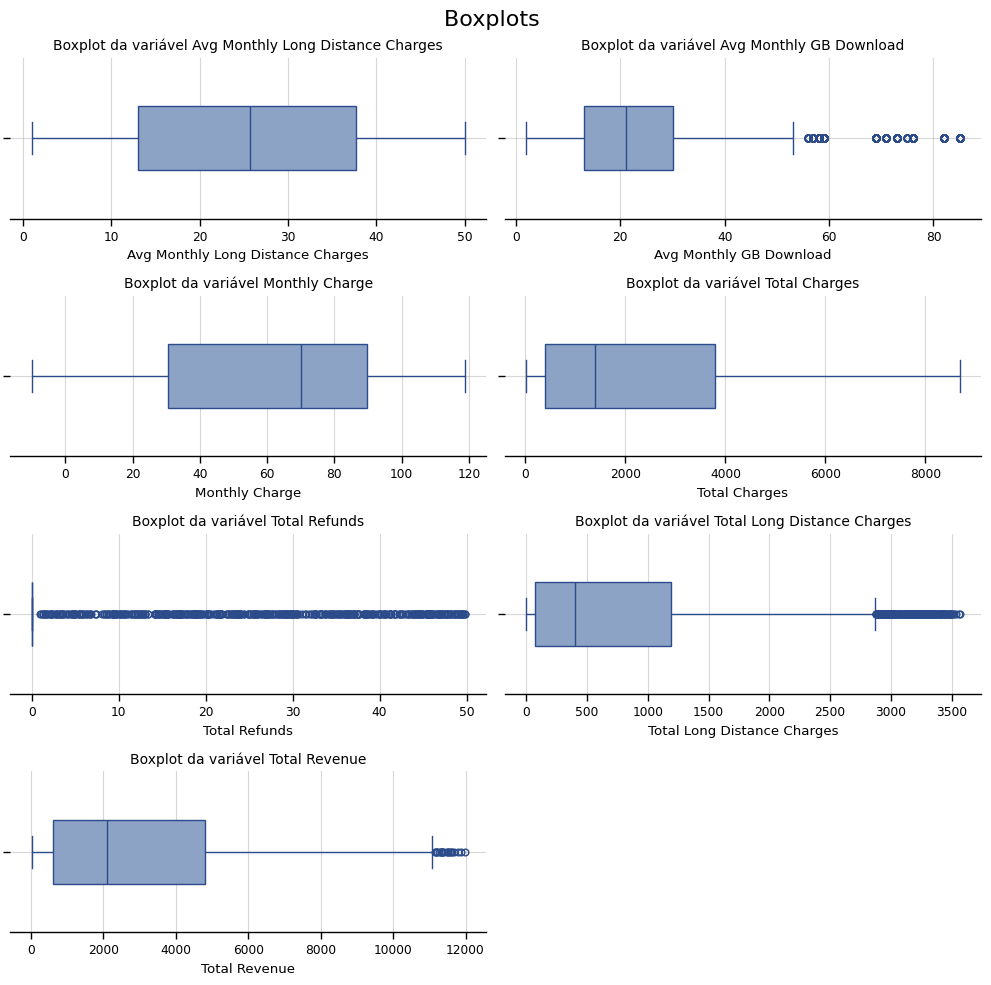

In [26]:
plt.figure(figsize = (10, 10))
plt.suptitle('Boxplots ', fontsize=16)

for i, q in enumerate(colunas_continuas, 1):
    plt.subplot(4, 2, i)
    ax = sns.boxplot(data = df_selecao[q], color = paleta[2], linecolor = paleta[0], orient='h', width=0.4)
    sns.despine(left = True)
    plt.title(f'Boxplot da variável {q}', fontsize=10)
    plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()

In [27]:
variaveis_com_nulos_object = df[variaveis_com_nulos].dtypes[df[variaveis_com_nulos].dtypes == 'object'].index
variaveis_com_nulos_object = variaveis_com_nulos_object.to_list()

In [28]:
df[variaveis_com_nulos_object].describe().T

,count,unique,top,freq
Multiple Lines,6361,2,No,3390
Internet Type,5517,3,Fiber Optic,3035
Online Security,5517,2,No,3498
Online Backup,5517,2,No,3088
Device Protection Plan,5517,2,No,3095
Premium Tech Support,5517,2,No,3473
Streaming TV,5517,2,No,2810
Streaming Movies,5517,2,No,2785
Streaming Music,5517,2,No,3029
Unlimited Data,5517,2,Yes,4745


Os missing values serão substituídos pela categoria mais frente (coluna 'top').

### Padronização dos dados 

Os dados serão escalonados porque utilizaremos o K-means, técnica não superviosanada baseado em distâncias euclidianas. 
- Os valores ausentes na variáveis numéricas serão subsituídos pela mediana porque possui valores discrepantes e os missing values das variáveis categóricas serão substituídas pela categoria mais frequente (moda). Optamos por não excluir os dados para evitar perda informacional. Além disso, a imputação dos dados não implicará em um viés de resultados pois os missing values compõem no máximo 21% do número total de observações.
- Os dados numéricos serão padronizados usando o RobustScaler() que é menos sensível a outliers porque utiliza IQR e mediana para lidar com valores discrepantes. 

> **Breve explicação sobre os métodos de padronização**
> 
> **1. MinMax Scaler**
> - **Como funciona**: Normaliza os valores para o intervalo \([0, 1]\) (ou outro intervalo especificado), usando a fórmula:
 $$
  X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
  $$
> - **Impacto dos outliers**: **Muito sensível** a outliers. Os valores extremos afetam significativamente o escalonamento, distorcendo os dados e comprimindo a maior parte dos valores.
> - **Quando usar**: Dados sem outliers ou quando é essencial manter as proporções dos valores no intervalo definido.
>
> **2. Standard Scaler**
> - **Como funciona**: Centraliza os dados em torno de 0 com desvio padrão de 1, usando a fórmula:
  $$
  X_{\text{scaled}} = \frac{X - \mu}{\sigma}
  $$
  Onde \\(\mu\\) é a média e \\(\sigma\\) é o desvio padrão.
> - **Impacto dos outliers**: Moderadamente sensível. Como outliers influenciam a média e o desvio padrão, podem distorcer a transformação.
> - **Quando usar**: Dados com distribuição aproximadamente normal, onde os outliers não são muito extremos ou podem ser tratados previamente.
>
> **3. Robust Scaler**
> - **Como funciona**: Escalona os dados usando a mediana e o intervalo interquartil (IQR), o que reduz a influência de outliers:
 $$
  X_{\text{scaled}} = \frac{X - \text{mediana}}{\text{IQR}}
  $$
> - **Impacto dos outliers**: Menos sensível. Como usa a mediana e o IQR (valores robustos a outliers), é adequado para lidar com dados que têm valores extremos.
> - **Quando usar**: Dados com muitos outliers ou distribuição não normal.

In [29]:
df_tratado = df_selecao.copy()

In [30]:
df_numericas = df_tratado.select_dtypes(include=['float64', 'int64'])
df_categoricas = df_tratado.select_dtypes(include=['object'])

In [31]:
imputer_num = SimpleImputer(strategy='median')
df_numericas_imputadas = pd.DataFrame(imputer_num.fit_transform(df_numericas), columns=df_numericas.columns)

In [32]:
imputer_cat = SimpleImputer(strategy='most_frequent')
df_categoricas_imputadas = pd.DataFrame(imputer_cat.fit_transform(df_categoricas), columns=df_categoricas.columns)

In [33]:
scaler = RobustScaler()
df_numericas_escaladas = pd.DataFrame(scaler.fit_transform(df_numericas_imputadas), columns=df_numericas.columns)

In [34]:
df_final = pd.concat([df_numericas_escaladas, df_categoricas_imputadas], axis=1)
df_final.head()

,Age,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,...,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status
0,-0.321429,0.0,-0.090768,0.666667,-0.434783,0.761167,-0.416667,-0.074979,-0.236605,0.00,...,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,Stayed
1,0.000000,0.0,-0.716233,0.000000,-0.434783,-0.683683,-0.916667,-1.247683,-0.251635,38.33,...,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,Stayed
2,0.142857,0.0,-0.276022,0.000000,-0.543478,0.362808,0.750000,0.064869,-0.328869,0.00,...,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Churned
3,1.142857,0.0,0.320632,0.333333,-0.347826,0.097083,-1.416667,0.470935,-0.046273,0.00,...,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Churned
4,1.035714,0.0,-0.157373,1.000000,-0.565217,-0.834549,-0.833333,0.233361,-0.332841,0.00,...,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,Churned


In [35]:
def transformar_colunas(df):
    num_cols = df.select_dtypes(include=['number']).columns
    cat_cols = df.select_dtypes(exclude=['number']).columns
    
    le = LabelEncoder()
    for col in cat_cols:
        df[col] = le.fit_transform(df[col])
        joblib.dump(le, f'encoder/label_encoder_{col}.pkl') 
    
    return df

In [58]:
def reverter_colunas(df):
    
    for col in df.columns.tolist():
        try:
            # Tenta carregar o encoder para a coluna
            le = joblib.load(f'encoder/label_encoder_{col}.pkl')
            
            # Aplica a inversão se o encoder foi carregado com sucesso
            df[col] = le.inverse_transform(df[col])
        
        except FileNotFoundError:
            # Se o arquivo não for encontrado, exibe uma mensagem e ignora a coluna
            print(f"Arquivo de encoder não encontrado para a coluna: {col}. A coluna será ignorada.")
        except Exception as e:
            # Em caso de qualquer outro erro, imprime a mensagem e continua
            print(f"Erro ao processar a coluna {col}: {e}")
    
    return df

In [37]:
df_final = transformar_colunas(df_final)

In [38]:
df_final.head()

,Age,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,...,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status
0,-0.321429,0.0,-0.090768,0.666667,-0.434783,0.761167,-0.416667,-0.074979,-0.236605,0.00,...,0,1,1,0,0,1,1,1,1,2
1,0.000000,0.0,-0.716233,0.000000,-0.434783,-0.683683,-0.916667,-1.247683,-0.251635,38.33,...,0,0,0,1,1,0,0,0,1,2
2,0.142857,0.0,-0.276022,0.000000,-0.543478,0.362808,0.750000,0.064869,-0.328869,0.00,...,1,0,0,0,0,1,0,1,0,0
3,1.142857,0.0,0.320632,0.333333,-0.347826,0.097083,-1.416667,0.470935,-0.046273,0.00,...,1,0,1,1,0,1,0,1,0,0
4,1.035714,0.0,-0.157373,1.000000,-0.565217,-0.834549,-0.833333,0.233361,-0.332841,0.00,...,0,1,1,0,0,1,0,1,1,0


<div class="alert alert-block alert-danger">
FALTA TRANSFORMAR OS DADOS CATEGÓRICOS EM NUMÉRICOS
</div>

> 1. **One-Hot Encoding**:
>    - Transforma cada categoria em uma nova coluna binária (0 ou 1).
>    - Útil quando não há relação de ordem entre as categorias.
>    - Pode aumentar muito o número de dimensões (especialmente para variáveis com muitas categorias).
> 
> 2. **Ordinal Encoding**:
>    - Atribui números inteiros às categorias.
>    - Adequado para variáveis categóricas com ordem natural (por exemplo, "Baixo", "Médio", "Alto").
>    - Não recomendado para variáveis sem relação de ordem, pois pode introduzir um viés artificial.
> 
> 3. **Target Encoding**:
>    - Substitui as categorias por uma estatística (como a média ou mediana) baseada no objetivo ou outra variável de interesse.
>    - Usado principalmente em problemas supervisionados, mas pode ser adaptado para clusterização.
> 
> 4. **Embeddings (para textos ou categorias complexas)**:
>    - Representa categorias como vetores em um espaço de características.
>    - Útil para variáveis categóricas com grande número de categorias (como nomes de produtos).



In [39]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_final)

In [40]:
pca = PCA(n_components=0.9)  # Retém 90% da variância
data_reduced = pca.fit_transform(data_scaled)

## Clusterização: K-means 

### Determinando o K ótimo

#### Inércia e Método do Cotovelo

A inércia (WCSS - Within-Cluster-Sum-of-Squares) mede a soma das distâncias quadráticas dos pontos aos seus centróides dentro de cada cluster. O método do cotovelo ajuda a encontrar o número ideal de clusters observando a redução da inércia.

> A inércia é a "soma de quadrados intra-cluster", representa a soma das distâncias ao quadrado entre os pontos de um cluster e seus respectivos centróides. Quanto menor for a inércia (WCSS), mais eficaz parece ser a clusterização — mas apenas até certo ponto! À medida que o número de clusters ($k$) aumenta, o WCSS diminui continuamente, atingindo o mínimo quando cada ponto se torna um cluster individual (o que não é prático, já que não há agrupamento real nesse ca

In [41]:
range_clusters = range(2, 18)

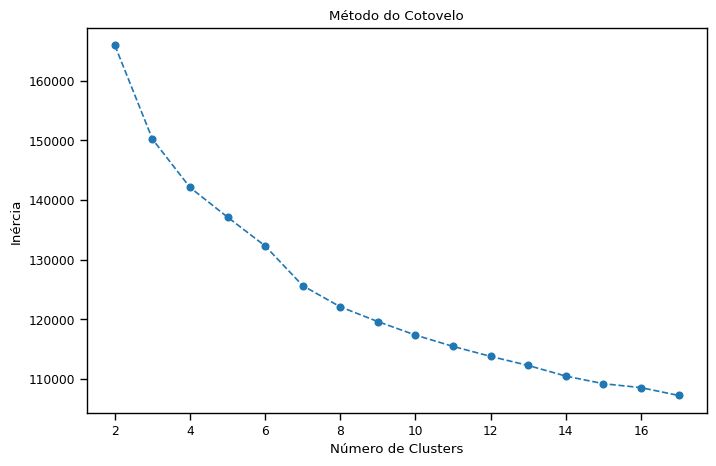

In [42]:
inertia = []

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_reduced)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

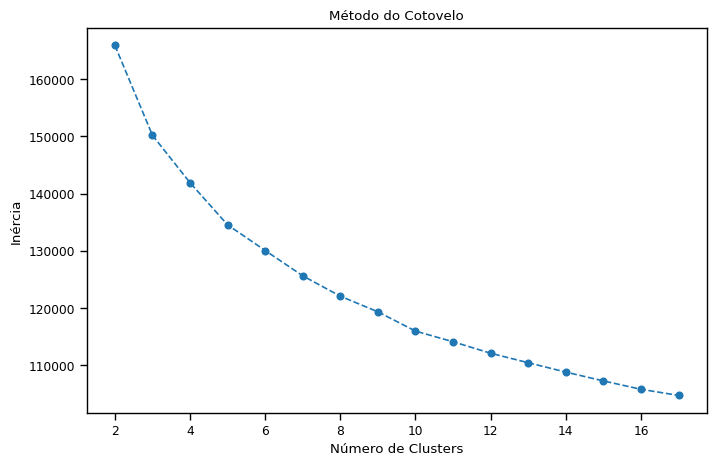

In [43]:
inertia = []

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, init='random', random_state=42)
    kmeans.fit(data_reduced)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

#### Método da Silhueta

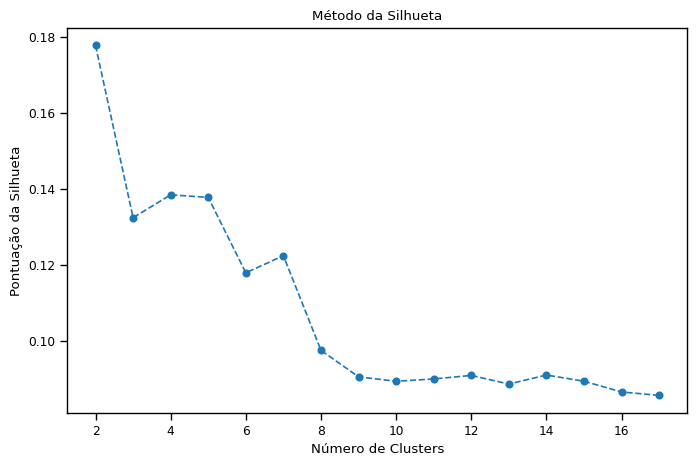

In [44]:
silhouette = []

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_reduced)
    labels = kmeans.labels_
    silhouette_score_value = silhouette_score(data_reduced, labels)
    silhouette.append(silhouette_score_value)

plt.figure(figsize=(8, 5))
plt.plot(range_clusters, silhouette, marker='o', linestyle='--')
plt.title('Método da Silhueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação da Silhueta')
plt.show()

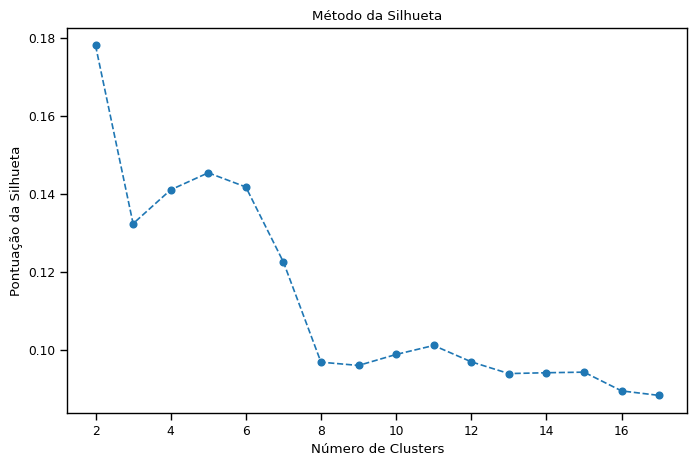

In [45]:
silhouette = []

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, init='random', random_state=42)
    kmeans.fit(data_reduced)
    labels = kmeans.labels_
    silhouette_score_value = silhouette_score(data_reduced, labels)
    silhouette.append(silhouette_score_value)

plt.figure(figsize=(8, 5))
plt.plot(range_clusters, silhouette, marker='o', linestyle='--')
plt.title('Método da Silhueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação da Silhueta')
plt.show()

### Variáveis para a Clusterização

In [46]:
def colunas_corr_mais_proximas(df, coluna, limiar=0.4):
    corr_matrix = df.corr()
    correlacoes = corr_matrix[coluna]
    colunas_mais_correlacionadas = correlacoes[abs(correlacoes) >= limiar].index.tolist()
    colunas_mais_correlacionadas.remove(coluna)
    
    return list(colunas_mais_correlacionadas)

In [47]:
melhores_colunas = colunas_corr_mais_proximas(df_final, 'Customer Status')
melhores_colunas.append('Customer Status')
print(melhores_colunas)

['Tenure in Months', 'Contract', 'Customer Status']


In [48]:
X = df_final[melhores_colunas]
X_scaled = scaler.fit_transform(X)

In [ ]:
kmeans = KMeans(n_clusters=9, init='k-means++', random_state=42)
df_final['cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
df_final = reverter_colunas(df_final)
df_final.head()

Arquivo de encoder não encontrado para a coluna: Age. A coluna será ignorada.
Arquivo de encoder não encontrado para a coluna: Number of Dependents. A coluna será ignorada.
Arquivo de encoder não encontrado para a coluna: Zip Code. A coluna será ignorada.
Arquivo de encoder não encontrado para a coluna: Number of Referrals. A coluna será ignorada.
Arquivo de encoder não encontrado para a coluna: Tenure in Months. A coluna será ignorada.
Arquivo de encoder não encontrado para a coluna: Avg Monthly Long Distance Charges. A coluna será ignorada.
Arquivo de encoder não encontrado para a coluna: Avg Monthly GB Download. A coluna será ignorada.
Arquivo de encoder não encontrado para a coluna: Monthly Charge. A coluna será ignorada.
Arquivo de encoder não encontrado para a coluna: Total Charges. A coluna será ignorada.
Arquivo de encoder não encontrado para a coluna: Total Refunds. A coluna será ignorada.
Arquivo de encoder não encontrado para a coluna: Total Extra Data Charges. A coluna será

,Age,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,...,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status,cluster
0,-0.321429,0.0,-0.090768,0.666667,-0.434783,0.761167,-0.416667,-0.074979,-0.236605,0.00,...,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,Stayed,7
1,0.000000,0.0,-0.716233,0.000000,-0.434783,-0.683683,-0.916667,-1.247683,-0.251635,38.33,...,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,Stayed,0
2,0.142857,0.0,-0.276022,0.000000,-0.543478,0.362808,0.750000,0.064869,-0.328869,0.00,...,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Churned,2
3,1.142857,0.0,0.320632,0.333333,-0.347826,0.097083,-1.416667,0.470935,-0.046273,0.00,...,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Churned,2
4,1.035714,0.0,-0.157373,1.000000,-0.565217,-0.834549,-0.833333,0.233361,-0.332841,0.00,...,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,Churned,2


In [ ]:
def moda(series):
    return series.mode()[0]

numerical_cols = df_final.select_dtypes(include=['number']).columns
categorical_cols = df_final.select_dtypes(exclude=['number']).columns

cluster_means = df_final.groupby('cluster').agg(
    { 
        **{col: 'mean' for col in numerical_cols},
        **{col: moda for col in categorical_cols}
    }
)

In [65]:
cluster_means

,Age,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,...,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status
cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.133612,0.558965,0.003647,0.522212,-0.309871,-0.008854,0.489134,-0.232361,-0.148706,1.867258,...,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Stayed
1,-0.004589,0.690896,0.007011,1.159814,0.767940,-0.027150,0.374266,-0.076452,0.876614,2.336322,...,Yes,Yes,Yes,Yes,No,Yes,Two Year,Yes,Credit Card,Stayed
2,0.118794,0.143262,-0.027352,0.132861,-0.451788,-0.030190,0.199350,-0.020812,-0.223556,1.257454,...,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Churned
3,0.188085,0.746300,0.004355,0.821001,-0.126206,-0.052788,0.087562,-0.388151,-0.082594,3.145560,...,No,No,No,No,No,Yes,Two Year,No,Credit Card,Stayed
4,-0.040745,0.617063,-0.020560,0.883598,0.377200,0.001712,0.584160,0.079225,0.648458,2.300615,...,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Stayed
5,-0.150546,0.356481,-0.024136,0.305556,-0.593146,-0.067471,0.245949,-0.472347,-0.388879,0.244745,...,No,No,No,No,No,Yes,Month-to-Month,No,Credit Card,Joined
6,0.178338,0.041394,-0.019727,0.299201,0.412286,0.058283,0.217320,0.290173,0.851766,2.322375,...,Yes,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,Churned
7,0.011015,0.534181,-0.008879,0.686804,-0.108281,0.027522,0.369502,-0.343701,-0.026112,2.105707,...,No,No,No,No,No,Yes,One Year,No,Credit Card,Stayed
8,0.019347,0.549932,-0.015161,1.006384,0.598525,0.027142,0.425217,0.055635,0.854153,2.426088,...,Yes,No,Yes,Yes,No,Yes,One Year,Yes,Bank Withdrawal,Stayed


## Clusterização: DBSCAN

In [66]:
df_final = transformar_colunas(df_final)

In [75]:
X = df_final.values
X_scaled = scaler.fit_transform(X)

In [129]:
dbscan = DBSCAN(eps=0.5, min_samples=15, algorithm='auto')
y_dbscan = dbscan.fit_predict(X_scaled)

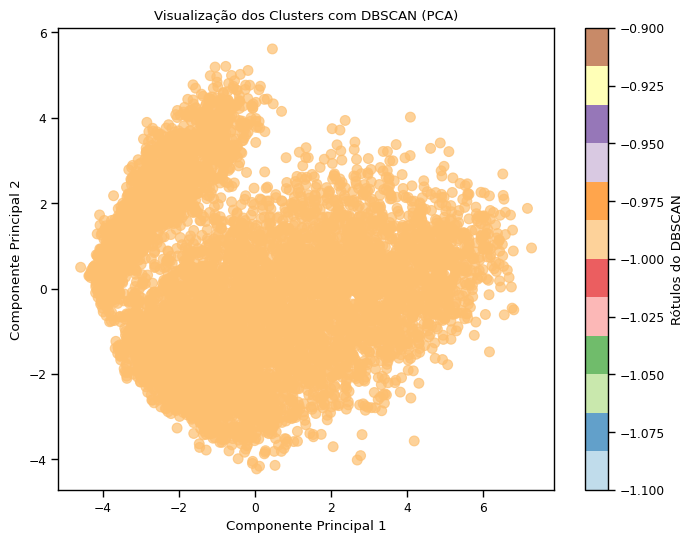

In [130]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_dbscan, cmap='Paired', s=50, alpha=0.7)
plt.title('Visualização dos Clusters com DBSCAN (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Rótulos do DBSCAN')
plt.show()

In [131]:
if len(set(y_dbscan)) > 1 and -1 not in set(y_dbscan):
    silhouette_avg = silhouette_score(X_scaled, y_dbscan)
    print(f'Índice de Silhueta: {silhouette_avg}')
else:
    print("O DBSCAN não encontrou clusters suficientes ou há muitos pontos de ruído.")

O DBSCAN não encontrou clusters suficientes ou há muitos pontos de ruído.


In [132]:
num_noise_points = list(y_dbscan).count(-1)
print(f'Número de pontos de ruído: {num_noise_points}')

Número de pontos de ruído: 7043


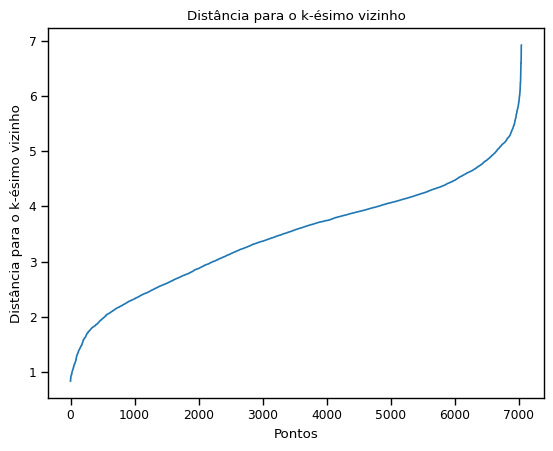

In [133]:
k = 5
nbrs = NearestNeighbors(n_neighbors=k).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

plt.plot(sorted(distances[:, -1]))
plt.xlabel('Pontos')
plt.ylabel('Distância para o k-ésimo vizinho')
plt.title('Distância para o k-ésimo vizinho')
plt.show()